In [ ]:
#Sample Data

import numpy as np
data = np.random.rand(25,224,224,3)

print("Shape of the data is", data.shape)
print("Minimum value of the data is", data.min())
print("Maximum value of the data is", data.max())

Shape of the data is (25, 224, 224, 3)
Minimum value of the data is 7.636554555379149e-08
Maximum value of the data is 0.9999996857498062


# AlexNet: Functional API

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

input_shape = (224,224,3)

def AlexNet(n_outputs):
  inputs = layers.Input(shape = input_shape)
  x = layers.Convolution2D(filters = 96, kernel_size = 11, strides = 4, padding = "same")(inputs)        #1st Conv layer
  x = layers.Activation("relu")(x)
  x = layers.BatchNormalization(axis  = -1)(x)
  x = layers.MaxPool2D(pool_size = 3, strides= 2)(x)

    
  x = layers.Convolution2D(filters = 256, kernel_size = 5, strides = 1, padding = "same")(x)        #2nd Convulational Layer
  x = layers.Activation("relu")(x)
  x = layers.BatchNormalization(axis  = -1)(x)
  x = layers.MaxPool2D(pool_size = 3, strides= 2)(x)
  

  x = layers.Convolution2D(filters = 384, kernel_size = 3, strides = 1, padding = "same")(x)         #3rd Convulational Layer
  x = layers.Activation("relu")(x)

  x = layers.Convolution2D(filters = 384, kernel_size = 3, strides = 1, padding = "same")(x)          #4th Convulational Layer
  x = layers.Activation("relu")(x)
  
  x = layers.Convolution2D(filters = 256, kernel_size = 3, strides = 1, padding = "same")(x)  #5th Convulational Layer
  x = layers.Activation("relu")(x)
  x = layers.BatchNormalization(axis  = -1)(x)
  x = layers.MaxPool2D(pool_size = 3, strides= 2)(x)

  x = layers.Flatten()(x)
  x = layers.Dense(units = 4096)(x)
  x = layers.Dense(units = 4096)(x)
  x = layers.Dropout(0.5)(x)

  if n_outputs == 2:
    x = layers.Dense(1)(x)
    op = layers.Activation("sigmoid")(x)
  else:
    x = layers.Dense(n_outputs)(x)
    op = layers.Activation("softmax")(x)

  model = tf.keras.Model(inputs, op)

  if n_outputs == 2:
    model.compile(optimizer = "adam", loss = "binary_cross_entropy")
  else:
    model.compile(optimizer = "adam", loss = "sparse_categorical_cross_entropy")

  return model

In [ ]:
model = AlexNet(1000)

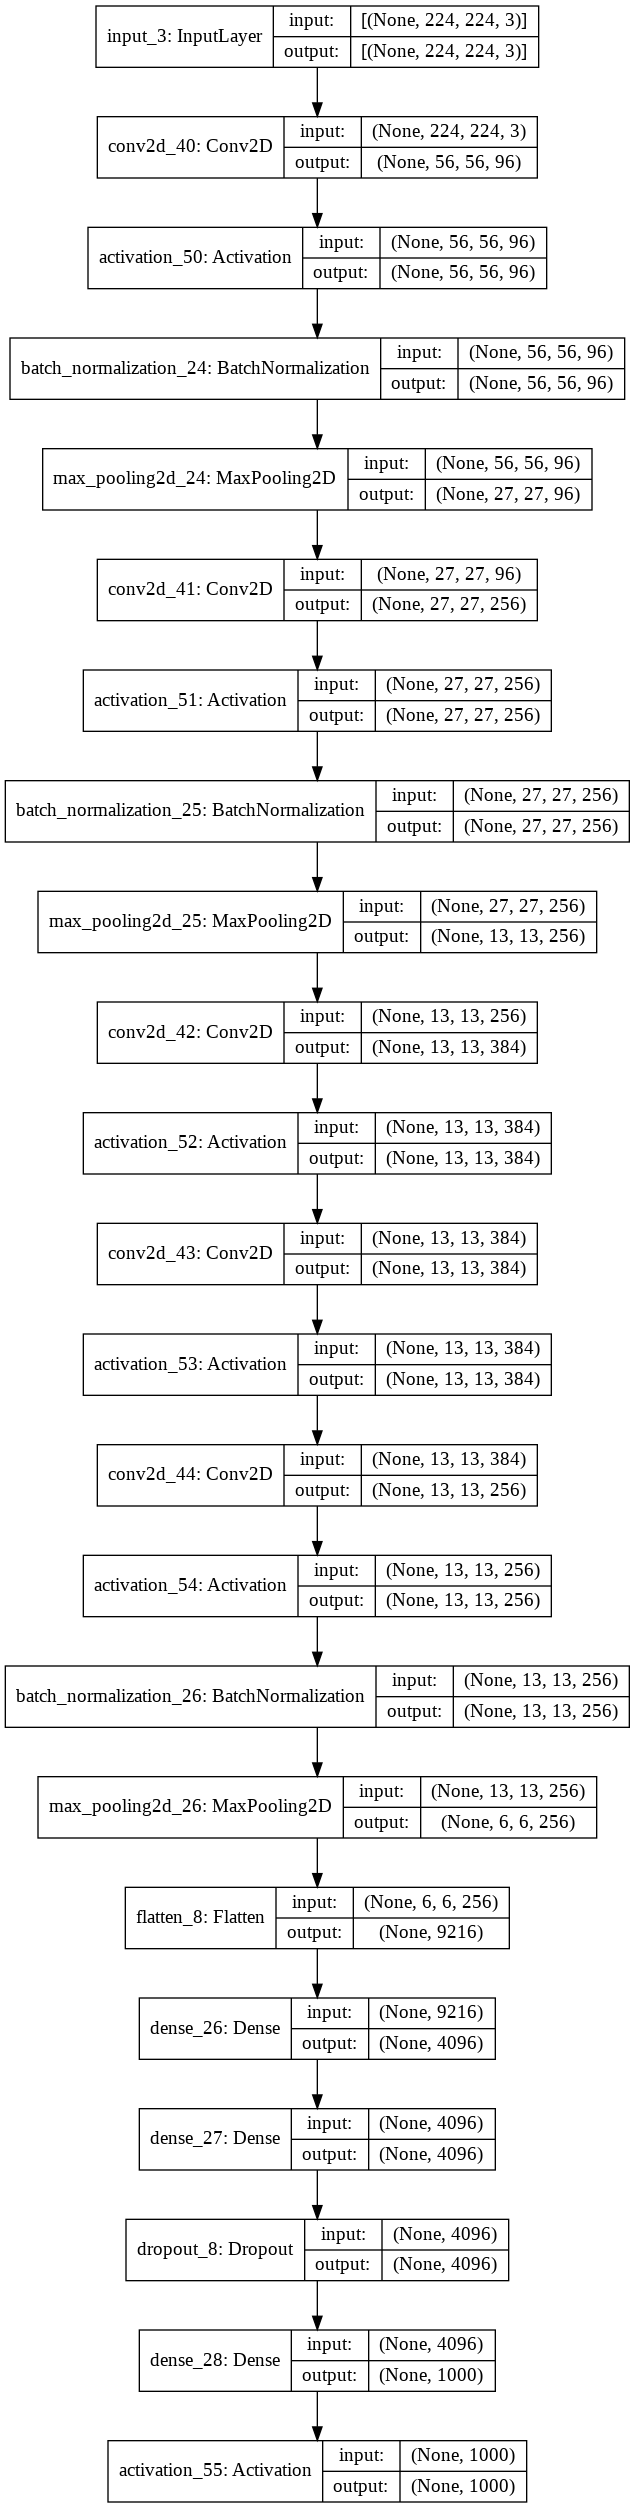

In [ ]:
tf.keras.utils.plot_model(model, "AlexNet.png", show_shapes=True)

# AlexNet: Model SubClass

In [ ]:
class Alexnet(tf.keras.Model):

  def __init__(self, n_classes, pool_size = 3, pool_stride = 2):
    super(Alexnet,self).__init__()
    
    self.n_classes = n_classes

    #declaring the modules
    self.Conv1 = layers.Convolution2D(filters = 96, kernel_size = 11, strides = 4, padding = "same")
    self.relu1 = layers.Activation("relu")
    self.batch_norm1 = layers.BatchNormalization(axis  = -1)
    self.maxpool1 = layers.MaxPool2D(pool_size= pool_size, strides= pool_stride)
    
    #2nd modules
    self.Conv2 = layers.Convolution2D(filters = 256, kernel_size = 5, strides = 1, padding = "same")
    self.relu2 = layers.Activation("relu")
    self.batch_norm2 = layers.BatchNormalization(axis  = -1)
    self.maxpool2 = layers.MaxPool2D(pool_size= pool_size, strides= pool_stride)   
  
    #3rd module  
    self.Conv3 = layers.Convolution2D(filters = 384, kernel_size = 3, strides = 1, padding = "same")
    self.relu3 = layers.Activation("relu")

    #4th module
    self.Conv4 = layers.Convolution2D(filters = 384, kernel_size = 3, strides = 1, padding = "same")
    self.relu4 = layers.Activation("relu")    

    #5th module
    self.Conv5 = layers.Convolution2D(filters = 256, kernel_size = 3, strides = 1, padding = "same")
    self.relu5 = layers.Activation("relu")
    self.batch_norm5 = layers.BatchNormalization(axis  = -1)
    self.maxpool5 = layers.MaxPool2D(pool_size= pool_size, strides= pool_stride)   

    
    #declaring the dense layers
    self.flatten = layers.Flatten()
    self.dense1 = layers.Dense(units = 4096)
    self.dense2 = layers.Dense(units = 4096)
    self.dropout = layers.Dropout(0.5)
    
    #output layers
    #n_classes =2
    self.dense_two_class = layers.Dense(units = 1)
    self.output_activation = layers.Activation("sigmoid")

    #n_classes != 2
    self.dense_op_multiclass = layers.Dense(units = 1000)
    self.softmax = layers.Activation("softmax")    



  def call(self, inputs):
    x = self.Conv1(inputs)  #1st Convulational Layer
    x = self.relu1(x)                                                        
    x = self.batch_norm1(x)
    x = self.maxpool1(x)
    
    x = self.Conv2(x)   #2nd Convulational Layer
    x = self.relu2(x)
    x = self.batch_norm2(x)
    x = self.maxpool2(x)   

    x = self.Conv3(x)   #3rd Convulational Layer
    x = self.relu3(x)

    x = self.Conv4(x)   #4th Convulational Layer
    x = self.relu4(x)
    
    x = self.Conv5(x)   #5th Convulational Layer
    x = self.relu5(x)
    x = self.batch_norm5(x)
    x = self.maxpool5(x)  

    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dropout(x)

    if self.n_classes == 2:
      x = self.dense_two_class(x)
      outputs = self.output_activation(x)

    else:
      x = self.dense_op_multiclass(x)
      outputs = self.softmax(x)

    return outputs


In [ ]:
n_classes = 1000

model1 = Alexnet( n_classes = n_classes, pool_size = 3, pool_stride = 2)

if n_classes == 2:
  model1.compile(optimizer = "adam", loss = "binary_cross_entropy")
else:
  model1.compile(optimizer = "adam", loss = "sparse_categorical_cross_entropy")

# Learnings

#### Functional API

1. Input shape is mentioned , data is not as data is fit via model.fit
2. Get the output , and may/maynot go for model compile within the function only.
3. The Input layers only enforces the shape, it takes no input. So, do not assign any input to it
4. However, Input class output will be the input to the next module
5. Use tf.keras.Model for finaly creating the model with inputs: the output of Input layer, and outputs: the output of my last layer

##### Model Subclassing

1. In case of model subclassing, we do use Input layer or Input shape
2. In call function, we only return the output
3. Once we have instantiated an object of model class, then we can compile it basis appropriate cost function
4. Fit, Evaluation, Predict are same as Sequential/ Functional models